In [842]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [843]:
import time
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import os
import io

In [844]:
#twitter credentials
consumerkey= ''
consumersecret= ''
accesstoken= ''
access_token_secret= ''
 


In [845]:








# Authenticate to the API
auth = tweepy.OAuthHandler(consumerkey, consumersecret ) 
# Access to user's access token and access token secret 
auth.set_access_token(accesstoken, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=False)


# Define the list of terms to listen to
hashtagstofind = ["#Trump","#Donal_Trump","#Donaldtrump","#JOE_BIDEN","#joebiden","#biden"]


text=[]
user_id=[]
id=[]
posted_at=[] 
hashtags=[]
#write data to pub/sub of GCP to store
def write_to_pubsub(data):
    
    
    try:
        
        if data["lang"] == "en":
            
            text.append(data["text"])
            user_id.append(data["user_id"])
            id.append(data["id"])
            print(len(text))
            hashtags.append(data["hashtags"])
            posted_at.append(datetime.datetime.fromtimestamp(data["created_at"]).strftime('%Y-%m-%d %H:%M:%S'))
        #if you dont want to stop the streaming use below code
        if len(text)==20000:
            
            data1 = pd.DataFrame()
            data1['Tweet'] = text
            data1['created_at'] = posted_at
            data1['hashtags']=hashtags
            data1.to_csv('complete1.csv', index= False)    
         
    except Exception as e:
        raise




#formatting the incomming stream of data
def reformat_tweet(tweet):
       
    x = tweet

    processed_doc = {
        "id": x["id"],
        "lang": x["lang"],
        "retweeted_id": x["retweeted_status"]["id"] if "retweeted_status" in x else None,
        "favorite_count": x["favorite_count"] if "favorite_count" in x else 0,
        "retweet_count": x["retweet_count"] if "retweet_count" in x else 0,
        "coordinates_latitude": x["coordinates"]["coordinates"][0] if x["coordinates"] else 0,
        "coordinates_longitude": x["coordinates"]["coordinates"][0] if x["coordinates"] else 0,
        "place": x["place"]["country_code"] if x["place"] else None,
        "user_id": x["user"]["id"],
        "created_at": time.mktime(time.strptime(x["created_at"], "%a %b %d %H:%M:%S +0000 %Y")),
        "S_name": x["user"]["screen_name"],
        
    }
    

    #print(len(hashtags))

    if x["entities"]["hashtags"]:
        processed_doc["hashtags"] = [y["text"] for y in
                                     x["entities"]["hashtags"]]
    else:
        processed_doc["hashtags"] = []

    if "extended_tweet" in x:
        processed_doc["text"] = x["extended_tweet"]["full_text"]
    elif "full_text" in x:
        processed_doc["text"] = x["full_text"]
    else:
        processed_doc["text"] = x["text"]



      

    if "extended_tweet" in x:
        processed_doc["text"] = x["extended_tweet"]["full_text"]
    elif "full_text" in x:
        processed_doc["text"] = x["full_text"]
    else:
        processed_doc["text"] = x["text"]

    return processed_doc




#calling the functions to initiate and implement stream genration
class MyStreamListener(tweepy.StreamListener):
    
    def _init_(self, api=None):
      
        super(MyStreamListener, self)._init_()
      

    def on_status(self, data):
      
        write_to_pubsub(reformat_tweet(data._json))
        
       

         
        #print("abhimanyu")
        return True

    def on_error(self, status_code):
        if status_code == 420:
          
          #returning False in on_data disconnects the stream
          return False




stream = tweepy.Stream(auth, MyStreamListener(), tweet_mode= 'extended')



stream.filter(track=hashtagstofind) 



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


KeyboardInterrupt: 

In [ ]:
"posted_at": datetime.datetime.fromtimestamp(data["created_at"]).strftime('%Y-%m-%d %H:%M:%S')

[1589194501.0,
 1589194502.0,
 1589194508.0,
 1589194508.0,
 1589194512.0,
 1589194512.0,
 1589194514.0,
 1589194514.0,
 1589194515.0,
 1589194517.0,
 1589194517.0,
 1589194520.0,
 1589194520.0,
 1589194525.0,
 1589194527.0,
 1589194528.0,
 1589194528.0,
 1589194529.0,
 1589194531.0,
 1589194533.0,
 1589194538.0,
 1589194540.0,
 1589194543.0,
 1589194547.0,
 1589194559.0,
 1589194561.0,
 1589194563.0,
 1589194566.0,
 1589194566.0,
 1589194568.0,
 1589194569.0,
 1589194572.0,
 1589194573.0,
 1589194574.0,
 1589194581.0,
 1589194584.0,
 1589194586.0,
 1589194587.0,
 1589194588.0,
 1589194588.0,
 1589194591.0,
 1589194593.0,
 1589194594.0,
 1589194596.0,
 1589194598.0,
 1589194599.0,
 1589194600.0,
 1589194601.0,
 1589194602.0,
 1589194605.0,
 1589194611.0,
 1589194615.0,
 1589194617.0,
 1589194618.0,
 1589194621.0,
 1589194622.0,
 1589194623.0,
 1589194623.0,
 1589194623.0,
 1589194624.0,
 1589194626.0,
 1589194627.0,
 1589194628.0,
 1589194633.0,
 1589194636.0,
 1589194640.0,
 158919464

'RT @eksnhlapo: Trying a #DonaldTrump #impersonation https://t.co/vhMXEnIawQ'

In [ ]:
#run below code when you manually stop streaming data

In [ ]:
#import pandas as pd
#data = pd.DataFrame()
#data['Tweet'] = text
#data['created_at'] = posted_at
#data['hashtags']=hashtags
#data.to_csv('Final.csv', index= False)    


In [75]:
#data.to_csv('finaltweets3.csv', index= False)

In [1049]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

role = get_execution_role()
bucket=''
data_key = 'complete1.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)


boto3.Session().resource('s3').Bucket(bucket).Object(data_key).upload_file('complete1.csv')

In [1050]:
 from io import StringIO

In [1051]:
s3 = boto3.resource('s3')
obj = s3.Object(bucket, data_key)
body= obj.get()['Body'].read().decode('utf-8')
df2 = pd.read_csv(StringIO(body))


In [1052]:
df2['created_at']

0       2020-05-13 10:52:55
1       2020-05-13 10:53:02
2       2020-05-13 10:53:02
3       2020-05-13 10:53:03
4       2020-05-13 10:53:04
               ...         
9995    2020-05-13 15:03:37
9996    2020-05-13 15:03:38
9997    2020-05-13 15:03:39
9998    2020-05-13 15:03:40
9999    2020-05-13 15:03:43
Name: created_at, Length: 10000, dtype: object

In [1053]:
df2.head()

,Tweet,created_at,hashtags
0,"RT @kamaalrkhan: Watch here, how does a journa...",2020-05-13 10:52:55,['DonaldTrump']
1,RT @zeusFanHouse: Fauci &amp; #Democrats Use S...,2020-05-13 10:53:02,"['Democrats', 'Trump', 'Vaccines', 'Fauci']"
2,RT @BetteMidler: Now Putin’s spokesman reporte...,2020-05-13 10:53:02,['DonaldTrump']
3,RT @zeba_mahnaz: Peace with #taliban is meanin...,2020-05-13 10:53:03,"['taliban', 'ghani', 'maternity', 'Barchie']"
4,RT @winston_gillies: Very well put!#WWG1WGAWOR...,2020-05-13 10:53:04,"['WWG1WGAWORLDWIDE', 'MAGA2020Landslide']"


In [1054]:
df2['hashtags']=df2['hashtags'].str.lower()

In [1055]:
listhash=df2['hashtags'].tolist()

In [1056]:
df2['Tweet']=df2['Tweet'].str.lower()
df2['Tweet'].str.replace('[@]\s*\w*\s*[:]*','')
df2.head()

,Tweet,created_at,hashtags
0,"rt @kamaalrkhan: watch here, how does a journa...",2020-05-13 10:52:55,['donaldtrump']
1,rt @zeusfanhouse: fauci &amp; #democrats use s...,2020-05-13 10:53:02,"['democrats', 'trump', 'vaccines', 'fauci']"
2,rt @bettemidler: now putin’s spokesman reporte...,2020-05-13 10:53:02,['donaldtrump']
3,rt @zeba_mahnaz: peace with #taliban is meanin...,2020-05-13 10:53:03,"['taliban', 'ghani', 'maternity', 'barchie']"
4,rt @winston_gillies: very well put!#wwg1wgawor...,2020-05-13 10:53:04,"['wwg1wgaworldwide', 'maga2020landslide']"


In [1057]:
firsttweet = df2.iloc[0]['Tweet'] # select the first row, column text, python indexing starts with 0 not 1
firsttweet


'rt @kamaalrkhan: watch here, how does a journalist fight with president #donaldtrump face to face during a press confrnc. can modi ji face…'

In [1058]:
import nltk


In [1059]:
punctuations = ['``',"bettemidler","kamaalrkhan","https","amp","...", '#', '$', '%', '&', '(', ')', '*', '+', '-', '/', ':', '<', '=', '>', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [1060]:
import string
reviewwords = []
data = []
data1 = []
for review in df2['Tweet']: # loop over tweets
    reviewwords = nltk.tokenize.word_tokenize(review) # break into words
    data = [word for word in reviewwords if word not in punctuations]
    data1.append("".join([" "+i if not i.startswith("'") else i for i in data]).strip())
    
    
#fdist = nltk.probability.FreqDist(words) # calculate frequency distribution
#fdist.most_common(50)

In [1061]:
df2['Tweet'] = data1
df2['Tweet']

0       rt watch here , how does a journalist fight wi...
1       rt zeusfanhouse fauci ; democrats use senate t...
2       rt now putin ’ s spokesman reportedly has coro...
3       rt zeba_mahnaz peace with taliban is meaningle...
4       rt winston_gillies very well put ! wwg1wgaworl...
                              ...                        
9995    rt petekent01 garnorealestate wwwillstand kari...
9996                                          shame ! ! !
9997    rt trish_regan the economic casualties of this...
9998    rt sassy4trump 🇺🇸 bestpresidentever45 🇺🇸 wethe...
9999    rt trish_regan it ’ s pretty wild to think tha...
Name: Tweet, Length: 10000, dtype: object

In [1062]:
#nltk.download() # d vader_lexicon -> q

In [1063]:
df2

,Tweet,created_at,hashtags
0,"rt watch here , how does a journalist fight wi...",2020-05-13 10:52:55,['donaldtrump']
1,rt zeusfanhouse fauci ; democrats use senate t...,2020-05-13 10:53:02,"['democrats', 'trump', 'vaccines', 'fauci']"
2,rt now putin ’ s spokesman reportedly has coro...,2020-05-13 10:53:02,['donaldtrump']
3,rt zeba_mahnaz peace with taliban is meaningle...,2020-05-13 10:53:03,"['taliban', 'ghani', 'maternity', 'barchie']"
4,rt winston_gillies very well put ! wwg1wgaworl...,2020-05-13 10:53:04,"['wwg1wgaworldwide', 'maga2020landslide']"
...,...,...,...
9995,rt petekent01 garnorealestate wwwillstand kari...,2020-05-13 15:03:37,[]
9996,shame ! ! !,2020-05-13 15:03:38,[]
9997,rt trish_regan the economic casualties of this...,2020-05-13 15:03:39,[]
9998,rt sassy4trump 🇺🇸 bestpresidentever45 🇺🇸 wethe...,2020-05-13 15:03:40,"['bestpresidentever45', 'wethepeople', 'enatio..."


df2

In [1064]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1065]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


In [1066]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms)
    #return d
    #df3 = pd.DataFrame(d)
    #print(d)
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()
   

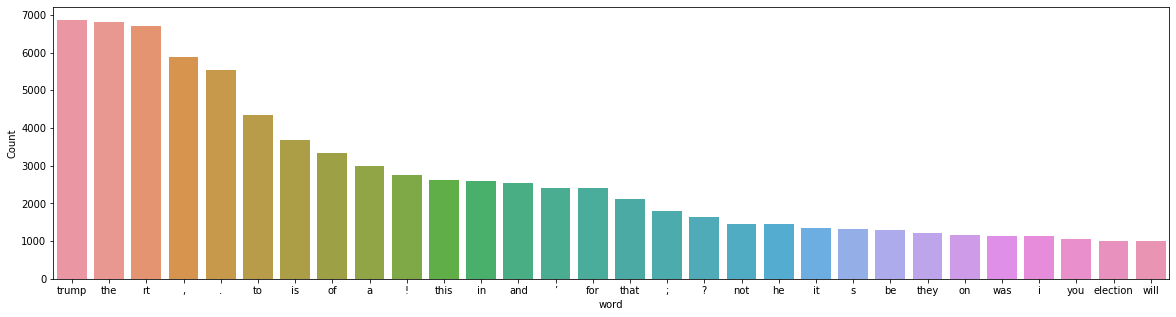

In [1067]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
freq_words(df2['Tweet'])
#df3 = pd.DataFrame(freq_words(df2['Review Text'],4823))
#df3.to_csv("words3.csv")

In [1068]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df2['Tweet'] = df2['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df2['Tweet']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [1069]:
#print(reviews)

In [1070]:
df2['Tweet'][1]

'zeusfanhouse fauci democrats use senate testimony stage bash trump promote vaccines fauci continues holding nation hostage…'

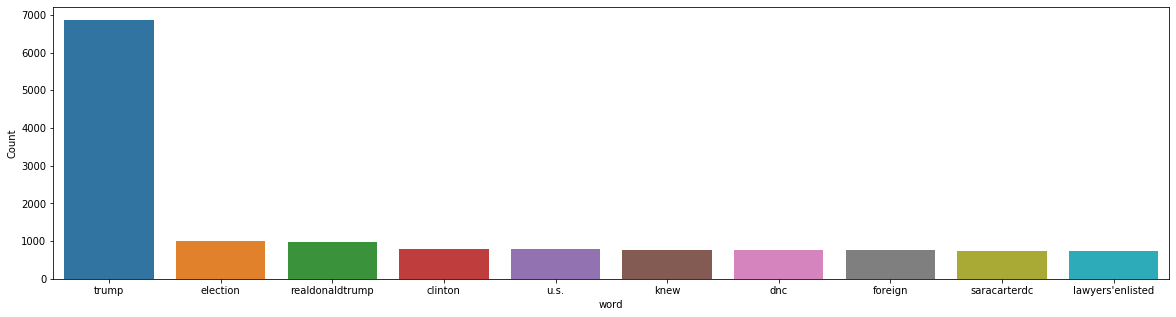

In [1071]:
freq_words(reviews, 10)

In [1072]:
#tokenization and lemmatization
#dividing the data based on electoral candidates
#Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word’s lemma, or dictionary form.

In [1073]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1074]:
#pip install spacy
#!python -m spacy download en_core_web_sm
#tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
#conda install -c conda-forge spacy-model-en_core_web_sm
#pip install spacy-udpipe

In [1075]:
!pip install numpy

In [1076]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    # filter noun and adjective
    output = []
    for sent in texts:
        
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
       
    return output

In [1077]:
#review_2=lemmatization(tokenized_reviews)

In [1078]:
reviews[0]


'watch journalist fight president donaldtrump face face press confrnc modi face…'

In [1079]:
# Define the sentence to be lemmatized
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemtweet=[]

for rev in reviews:
    # Tokenize: Split the sentence into words
    word_list = nltk.word_tokenize(rev)
    # Lemmatize list of words and join
    lemtweet.append(' '.join([lemmatizer.lemmatize(w) for w in word_list]))
    #print(lemmatized_output)
#> The striped bat are hanging on their foot for best

In [1080]:
#lemtweet

In [1081]:
import pandas as pd 
df1=pd.DataFrame()

In [1082]:
#df1['tweets']=lemtweet

In [1083]:
#df1.to_csv(r'lamatizedtweets.csv')

In [1084]:
df2['Tweet']=lemtweet

In [1085]:
df2

,Tweet,created_at,hashtags
0,watch journalist fight president donaldtrump f...,2020-05-13 10:52:55,['donaldtrump']
1,zeusfanhouse fauci democrat use senate testimo...,2020-05-13 10:53:02,"['democrats', 'trump', 'vaccines', 'fauci']"
2,putin spokesman reportedly coronavirus excuse ...,2020-05-13 10:53:02,['donaldtrump']
3,zeba_mahnaz peace taliban meaningless ghani fr...,2020-05-13 10:53:03,"['taliban', 'ghani', 'maternity', 'barchie']"
4,winston_gillies well put wwg1wgaworldwide maga...,2020-05-13 10:53:04,"['wwg1wgaworldwide', 'maga2020landslide']"
...,...,...,...
9995,petekent01 garnorealestate wwwillstand karicar...,2020-05-13 15:03:37,[]
9996,shame,2020-05-13 15:03:38,[]
9997,trish_regan economic casualty severe correlati...,2020-05-13 15:03:39,[]
9998,sassy4trump bestpresidentever45 wethepeople st...,2020-05-13 15:03:40,"['bestpresidentever45', 'wethepeople', 'enatio..."


In [1086]:
import re
list1=[]
for i in listhash:
    lentrump =len(re.findall('trump',i))
    lenjoe = len(re.findall('joe',i))
    
    if lentrump > lenjoe:
        list1.append('Donald Trump')
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on trump ")
        
    elif lenjoe > lentrump:
        list1.append('Joe Biden')
    elif lenjoe== lenjoe:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('Donald Trump,Joe Biden')

In [1087]:
len(list1)

10000

In [1088]:
#df = pd.DataFrame(data=df2['Tweet'])

In [1089]:
df2['Focussed attribute of review']=list1

In [1090]:
#df.to_csv('Tweetrelation.csv')

In [1091]:
df2.head()

,Tweet,created_at,hashtags,Focussed attribute of review
0,watch journalist fight president donaldtrump f...,2020-05-13 10:52:55,['donaldtrump'],Donald Trump
1,zeusfanhouse fauci democrat use senate testimo...,2020-05-13 10:53:02,"['democrats', 'trump', 'vaccines', 'fauci']",Donald Trump
2,putin spokesman reportedly coronavirus excuse ...,2020-05-13 10:53:02,['donaldtrump'],Donald Trump
3,zeba_mahnaz peace taliban meaningless ghani fr...,2020-05-13 10:53:03,"['taliban', 'ghani', 'maternity', 'barchie']","Donald Trump,Joe Biden"
4,winston_gillies well put wwg1wgaworldwide maga...,2020-05-13 10:53:04,"['wwg1wgaworldwide', 'maga2020landslide']","Donald Trump,Joe Biden"


In [1092]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sentences=df2['Tweet']
positivesg=[]
negativesg=[]
sid = SIA()
for sentence in sentences:
    ss = sid.polarity_scores(sentence) 
    #print("{:-<65} {}".format(l, str(vs)))
    positivesg.append(ss['pos'])
    negativesg.append(ss['neg'])

In [1093]:

for i in range(len(df2)):
    if positivesg[i] > negativesg[i]:
        df2.loc[i,'Positive']=1
        df2.loc[i,'Negative']=0
    else:
        df2.loc[i,'Negative']=1
        df2.loc[i,'Positive']=0
    
#mentionsfdist = nltk.probability.FreqDist(words2) # calculate frequency distribution
#mentionsfdist.most_common(50)

In [1094]:
df2.head()

,Tweet,created_at,hashtags,Focussed attribute of review,Negative,Positive
0,watch journalist fight president donaldtrump f...,2020-05-13 10:52:55,['donaldtrump'],Donald Trump,1.0,0.0
1,zeusfanhouse fauci democrat use senate testimo...,2020-05-13 10:53:02,"['democrats', 'trump', 'vaccines', 'fauci']",Donald Trump,0.0,1.0
2,putin spokesman reportedly coronavirus excuse ...,2020-05-13 10:53:02,['donaldtrump'],Donald Trump,0.0,1.0
3,zeba_mahnaz peace taliban meaningless ghani fr...,2020-05-13 10:53:03,"['taliban', 'ghani', 'maternity', 'barchie']","Donald Trump,Joe Biden",0.0,1.0
4,winston_gillies well put wwg1wgaworldwide maga...,2020-05-13 10:53:04,"['wwg1wgaworldwide', 'maga2020landslide']","Donald Trump,Joe Biden",0.0,1.0


In [1095]:
df2['Sentiment']= df2["Positive"] - df2["Negative"]

In [1096]:
df3=pd.DataFrame(df2)

In [1097]:
df3.drop(columns=['hashtags'])

,Tweet,created_at,Focussed attribute of review,Negative,Positive,Sentiment
0,watch journalist fight president donaldtrump f...,2020-05-13 10:52:55,Donald Trump,1.0,0.0,-1.0
1,zeusfanhouse fauci democrat use senate testimo...,2020-05-13 10:53:02,Donald Trump,0.0,1.0,1.0
2,putin spokesman reportedly coronavirus excuse ...,2020-05-13 10:53:02,Donald Trump,0.0,1.0,1.0
3,zeba_mahnaz peace taliban meaningless ghani fr...,2020-05-13 10:53:03,"Donald Trump,Joe Biden",0.0,1.0,1.0
4,winston_gillies well put wwg1wgaworldwide maga...,2020-05-13 10:53:04,"Donald Trump,Joe Biden",0.0,1.0,1.0
...,...,...,...,...,...,...
9995,petekent01 garnorealestate wwwillstand karicar...,2020-05-13 15:03:37,"Donald Trump,Joe Biden",1.0,0.0,-1.0
9996,shame,2020-05-13 15:03:38,"Donald Trump,Joe Biden",1.0,0.0,-1.0
9997,trish_regan economic casualty severe correlati...,2020-05-13 15:03:39,"Donald Trump,Joe Biden",1.0,0.0,-1.0
9998,sassy4trump bestpresidentever45 wethepeople st...,2020-05-13 15:03:40,Donald Trump,1.0,0.0,-1.0


In [1098]:
df3.created_at[0]

'2020-05-13 10:52:55'

In [1099]:
df3.created_at=pd.to_datetime(df3.created_at)

In [1100]:
df3['date'] = df3.created_at.map(lambda x:x.date())

In [1101]:
df3

,Tweet,created_at,hashtags,Focussed attribute of review,Negative,Positive,Sentiment,date
0,watch journalist fight president donaldtrump f...,2020-05-13 10:52:55,['donaldtrump'],Donald Trump,1.0,0.0,-1.0,2020-05-13
1,zeusfanhouse fauci democrat use senate testimo...,2020-05-13 10:53:02,"['democrats', 'trump', 'vaccines', 'fauci']",Donald Trump,0.0,1.0,1.0,2020-05-13
2,putin spokesman reportedly coronavirus excuse ...,2020-05-13 10:53:02,['donaldtrump'],Donald Trump,0.0,1.0,1.0,2020-05-13
3,zeba_mahnaz peace taliban meaningless ghani fr...,2020-05-13 10:53:03,"['taliban', 'ghani', 'maternity', 'barchie']","Donald Trump,Joe Biden",0.0,1.0,1.0,2020-05-13
4,winston_gillies well put wwg1wgaworldwide maga...,2020-05-13 10:53:04,"['wwg1wgaworldwide', 'maga2020landslide']","Donald Trump,Joe Biden",0.0,1.0,1.0,2020-05-13
...,...,...,...,...,...,...,...,...
9995,petekent01 garnorealestate wwwillstand karicar...,2020-05-13 15:03:37,[],"Donald Trump,Joe Biden",1.0,0.0,-1.0,2020-05-13
9996,shame,2020-05-13 15:03:38,[],"Donald Trump,Joe Biden",1.0,0.0,-1.0,2020-05-13
9997,trish_regan economic casualty severe correlati...,2020-05-13 15:03:39,[],"Donald Trump,Joe Biden",1.0,0.0,-1.0,2020-05-13
9998,sassy4trump bestpresidentever45 wethepeople st...,2020-05-13 15:03:40,"['bestpresidentever45', 'wethepeople', 'enatio...",Donald Trump,1.0,0.0,-1.0,2020-05-13


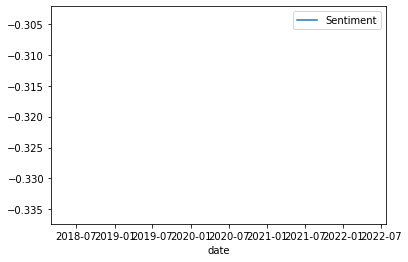

In [1102]:
df3[df3['Focussed attribute of review']=='Donald Trump'][['date','Sentiment']].groupby(by='date').mean().plot() # Trump

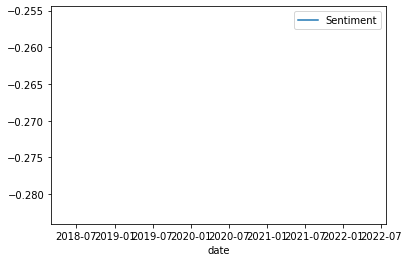

In [1103]:
df3[df3['Focussed attribute of review']=='Joe Biden'][['date','Sentiment']].groupby(by='date').mean().plot() # Joe

In [1104]:
df3['hour'] = df3.created_at.map(lambda x:x.hour)

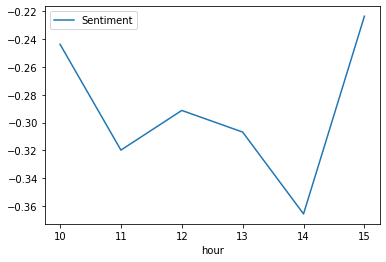

In [1105]:
df3[df3['Focussed attribute of review']=='Donald Trump'][['hour','Sentiment']].groupby(by='hour').mean().plot() # Trump

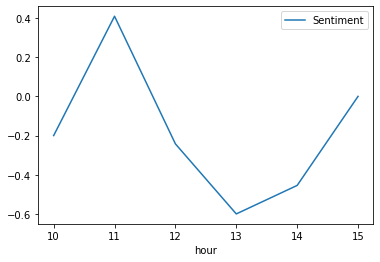

In [1106]:
df3[df3['Focussed attribute of review']=='Joe Biden'][['hour','Sentiment']].groupby(by='hour').mean().plot() # Joe

In [1107]:
Candidate = ['Donald Trump','Joe Biden']
Positive = [df3[df3['Focussed attribute of review']=='Donald Trump']['Positive'].sum()/len(df3[df3['Focussed attribute of review']=='Donald Trump']),
           df3[df3['Focussed attribute of review']=='Joe Biden']['Positive'].sum()/len(df3[df3['Focussed attribute of review']=='Joe Biden'])]
Negative = [df3[df3['Focussed attribute of review']=='Donald Trump']['Negative'].sum()/len(df3[df3['Focussed attribute of review']=='Donald Trump']),
           df3[df3['Focussed attribute of review']=='Joe Biden']['Negative'].sum()/len(df3[df3['Focussed attribute of review']=='Joe Biden'])]

In [1108]:
df = pd.DataFrame()
df['Candidate'] = Candidate
df['% Positive tweets'] = Positive
df['% Negative tweets'] = Negative

In [1109]:
df = df.set_index('Candidate')

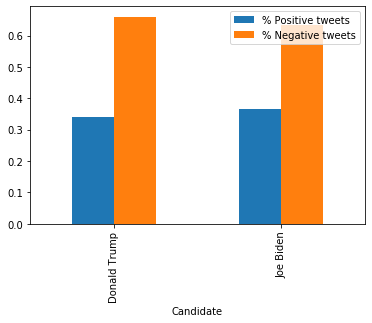

In [1110]:
df.plot(kind = 'bar')

In [1111]:
df

,% Positive tweets,% Negative tweets
Candidate,,
Donald Trump,0.340125,0.659875
Joe Biden,0.365385,0.634615


In [1112]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1113]:

import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
#initializing lemmatizer
#lemmatizer = WordNetLemmatizer()

#lemmitization of column and and converting labels to numerical value 
wordnet= df3['Tweet'].str.lower()

#a=wordnet.map(lambda x: nltk.word_tokenize(x))
#new=pd.DataFrame()
#new['t']=a.map(lambda x:' '.join([lemmatizer.lemmatize(w) for w in x] ))

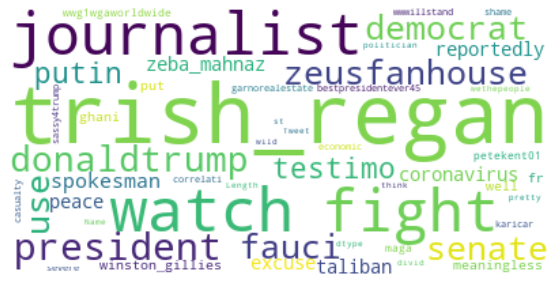

In [1114]:
import matplotlib.pyplot as plt

text=str(wordnet)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
# Display the generated image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [1115]:
type(text[0])

str

In [1116]:
trumpdf=pd.DataFrame(df3[df3['Focussed attribute of review']=='Donald Trump'])


In [1117]:
trumpdf

,Tweet,created_at,hashtags,Focussed attribute of review,Negative,Positive,Sentiment,date,hour
0,watch journalist fight president donaldtrump f...,2020-05-13 10:52:55,['donaldtrump'],Donald Trump,1.0,0.0,-1.0,2020-05-13,10
1,zeusfanhouse fauci democrat use senate testimo...,2020-05-13 10:53:02,"['democrats', 'trump', 'vaccines', 'fauci']",Donald Trump,0.0,1.0,1.0,2020-05-13,10
2,putin spokesman reportedly coronavirus excuse ...,2020-05-13 10:53:02,['donaldtrump'],Donald Trump,0.0,1.0,1.0,2020-05-13,10
7,saracarterdc new clinton dnc lawyers'enlisted ...,2020-05-13 10:53:11,"['new', 'trump', 'steele']",Donald Trump,1.0,0.0,-1.0,2020-05-13,10
10,adelafuente1 thanks trump,2020-05-13 10:53:15,['trump'],Donald Trump,0.0,1.0,1.0,2020-05-13,10
...,...,...,...,...,...,...,...,...,...
9988,zeusfanhouse fauci democrat use senate testimo...,2020-05-13 15:03:22,"['democrats', 'trump', 'vaccines', 'fauci']",Donald Trump,0.0,1.0,1.0,2020-05-13,15
9989,paint_the_trail super trump superman realdonal...,2020-05-13 15:03:22,"['trump', 'superman', 'fakenews', 'tweet', 'ma...",Donald Trump,0.0,1.0,1.0,2020-05-13,15
9990,trump scrub,2020-05-13 15:03:23,['trump'],Donald Trump,1.0,0.0,-1.0,2020-05-13,15
9991,petekent01 breaking snowflake meltdown coast c...,2020-05-13 15:03:23,"['breaking', 'snowflake', 'meltdown', 'trump',...",Donald Trump,0.0,1.0,1.0,2020-05-13,15


In [1118]:
joedf=pd.DataFrame(df3[df3['Focussed attribute of review']=='Joe Biden'])

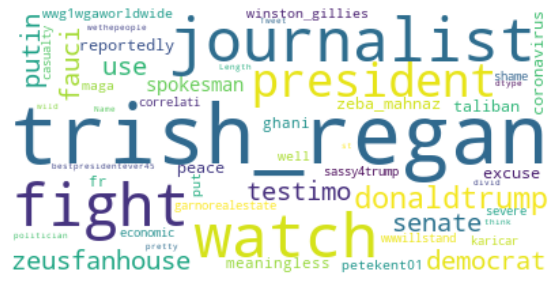

In [1119]:
toptrumwords=trumpdf['Tweet']
wordnet= toptrumwords.str.lower()
trumpwords=str(wordnet)
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(trumpwords)
# Display the generated image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

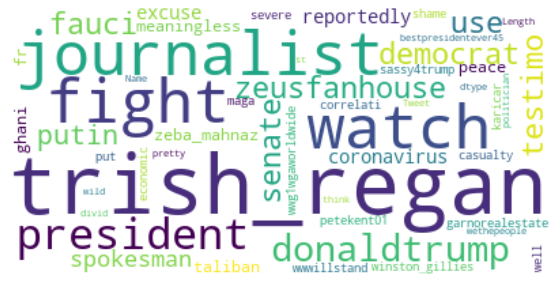

In [1120]:
topjoewords=joedf['Tweet']
wordnet= topjoewords.str.lower()
trumpwords=str(wordnet)
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(trumpwords)
# Display the generated image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [1121]:
###########################################################################################################3